<a href="https://colab.research.google.com/github/juacastanori/SyS/blob/main/Python_Se%C3%B1ales_SD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SEÑALES ESTANDAR
## EJERCICIOS - JUAN JERONIMO CASTAÑO RIVERA

In [17]:
%matplotlib inline
import sympy as sym
sym.init_printing()


x(t)= exp(t*(1.0*I*omega + sigma))


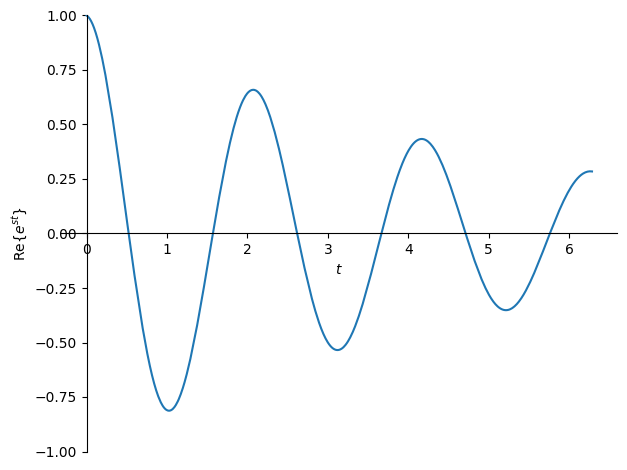

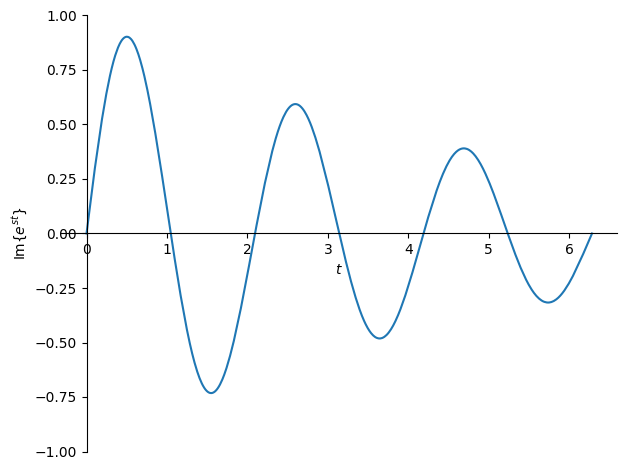

In [18]:
t, sigma, omega = sym.symbols('t sigma omega', real=True)#definir variables simbólicas
s = sigma + 1j*omega  #sobre carga operador para definir parte imaginaria
x = sym.exp(s*t)#función exponencial simbólica desde sympy
x

y = x.subs({omega: 3, sigma : -0.2}) #sustituir variables omega y sigma por valores numéricos
print(r'x(t)=',x)
#se gráfica desde el paquete plot de sympy por ser objetos de variable simbólica
sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-1,1])
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-1,1])


**Ejercicio**

* Pruebe otros valores de `omega` y `sigma` para crear señales con amplitud creciente/decreciente/constante y diferentes frecuencias angulares.

x(t)= exp(t*(1.0*I*omega + sigma))


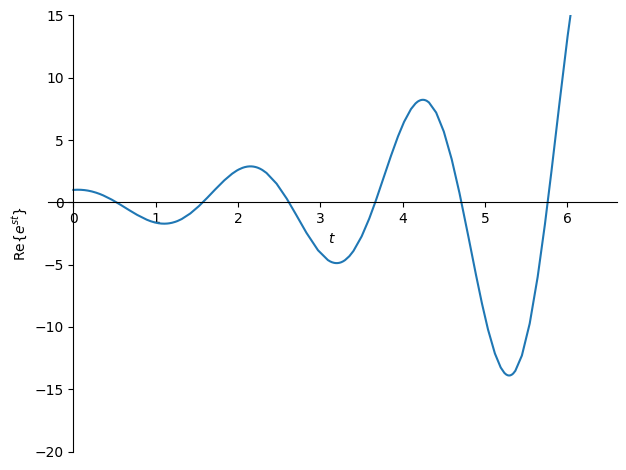

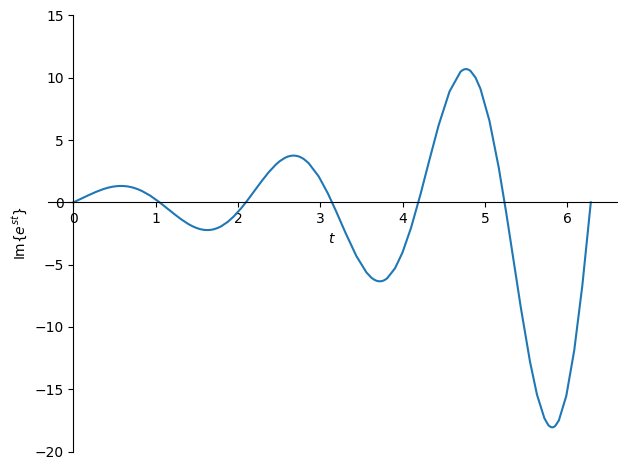

In [19]:
#ejemplo creciente -> sigma > 0
y = x.subs({omega: 3, sigma : 0.5})
print(r'x(t)=',x)

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-20,15]) #r' indica al linterprete una variable tipo string
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-20,15]);

Cuando sigma es mayor a cero, la función es creciente porque va en aumento hasta irse al infinito

x(t)= exp(t*(1.0*I*omega + sigma))


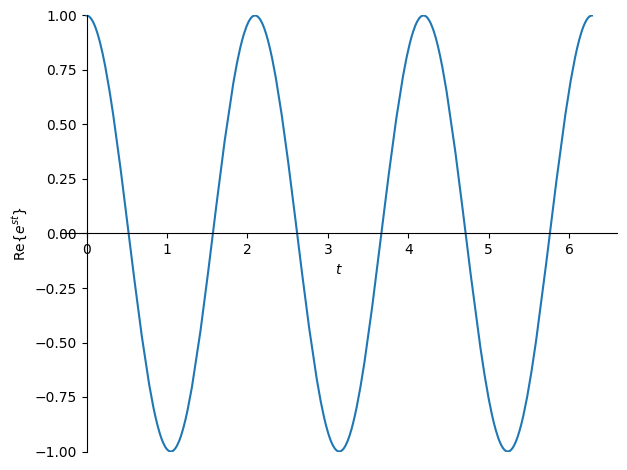

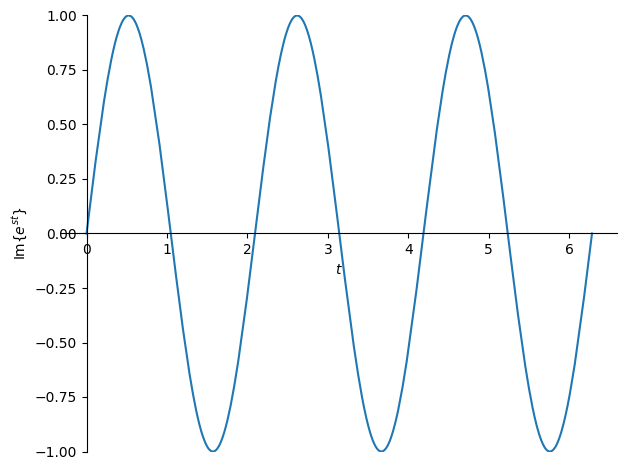

In [20]:
#ejemplo constante sigma = 0
y = x.subs({omega: 3, sigma : 0})
print(r'x(t)=',x)

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-1,1]) #r' indica al interprete una variable tipo string
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-1,1]);

Cuando sigma es cero, la función se convierte constante. Empieza a oscilar, pero no varía su amplitud. Es como tener una suma de dos funciones seno y coseno

x(t)= exp(t*(1.0*I*omega + sigma))


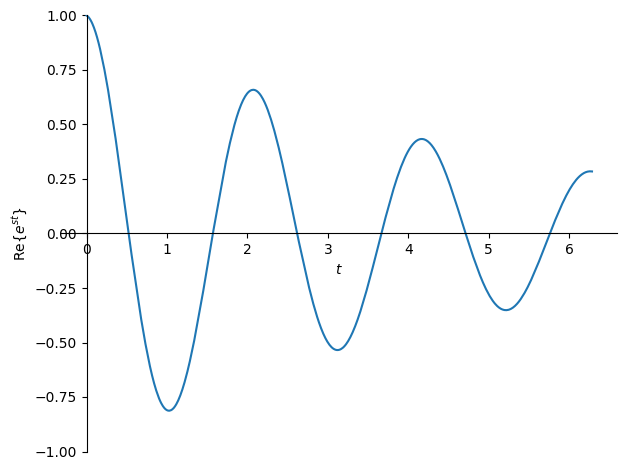

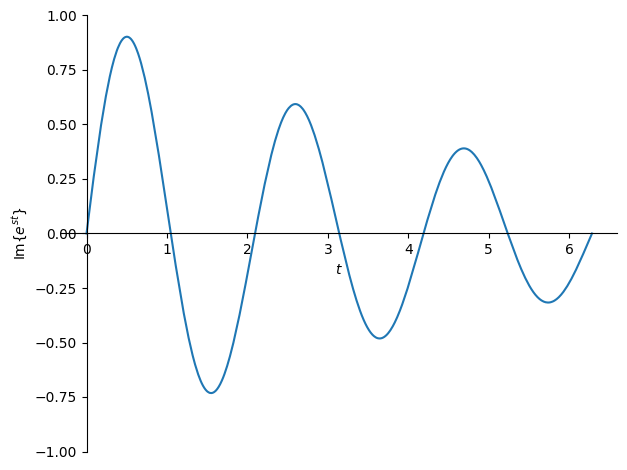

In [21]:
#ejemplo decreciente sigma < 0
y = x.subs({omega: 3, sigma : -0.2})
print(r'x(t)=',x)

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-1,1]) #r' indica al interprete una variable tipo string
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-1,1]);

Para valores de sigma menores a cero, la función se vuelve decreciente. LLega a un punto en la que la función llega a un valor muy pequeño (aproximadamente cero)

**Ejercicio**

* Compruebe la propiedad de selectividad, para un impulso de Dirac desplazado $\delta(t-\tau)$ y probar los resultados modificando el ejemplo anterior.

In [22]:
delta = sym.DiracDelta(t)#función dirac en sympy
delta
f = sym.Function('f')(t) # f(t)
sym.integrate(delta*f, (t, -sym.oo, sym.oo)) # integral con limites desde -inf hasta +inf
#f(t-\tau)
#definir tau
tau = sym.symbols('tau', real=True)
g = sym.Function('g')(t) # g(t)
delta_T = sym.DiracDelta(t-tau) # delta(t-tau)
delta_T
sym.integrate(delta_T*g, (t, -sym.oo, sym.oo))

g(τ)

La integral de un delta, ya sea o no desplazado en el tiempo siempre es la misma. Lo que cambia es que, al multiplicar por una funcion, lo que resulta es la funcion:
Si delta está definida para $t-\tau$

$t-\tau=0$

$t=\tau$

**Ejercicio**

* Use la función $\text{rect}(t)$ para construir una función $\cos(\omega t)$ con $\omega=2$, la cual se enciende en $t=-\frac{1}{2}$ y se apaga en $t=+\frac{1}{2}$.

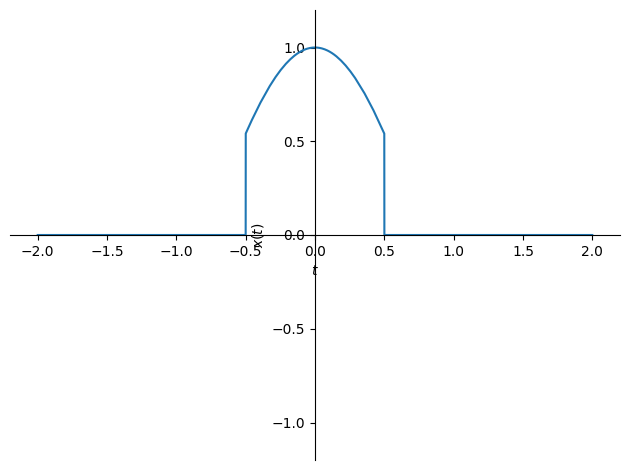

In [32]:
%matplotlib inline
import sympy as sym
sym.init_printing()
t, sigma, omega = sym.symbols('t sigma omega', real=True)

class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)
#sym.plot(rect(t), (t, -1, 1), ylim=[-0.2, 1.2], ylabel=r'rect$(t)$');
#x = sym.cos(omega*t+sym.pi/3) * rect(t)
x = sym.cos(omega*t) * rect(t)
sym.plot(x.subs(omega,2), (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');


**Ejercicio**

Genere un [rectificador de onda completa](https://en.wikipedia.org/wiki/Rectifier#Full-wave_rectification) utilizando la función $\text{sgn}(t)$

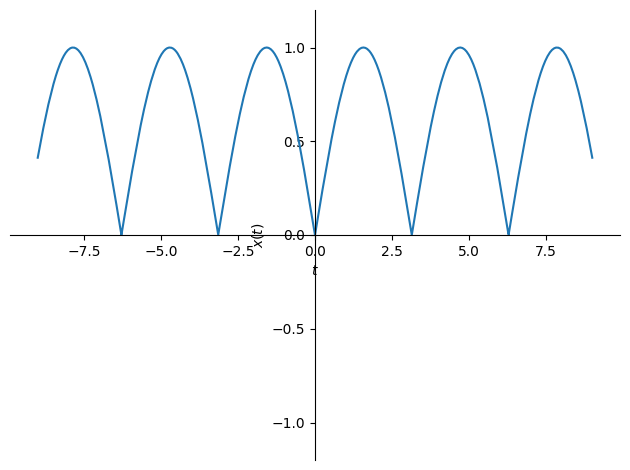

In [26]:
sgn = sym.sign(t)
sgn
#sym.plot(sgn, (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'sgn$(t)$');
x = sym.sin(omega*t) * sym.sign(sym.sin(omega*t))
sym.plot(x.subs(omega,1), (t, -9, 9), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');